# Sampling field phasors from quadrature uncertainty and plotting them
X1 and X2 are the electric field quadratues

Plotting field envelops

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches

## Generating uncertainty region
## $\Delta X1 \Delta X2 \geq 1/2$

In [2]:
# E0 = reference field amplitude, phi = reference field phase,Dx1 = var of X1, n = number of samples, covar = covar of dist
# generate samples within an uncertainty region

def generate_phase_sqzdStates(E0,phi,DX1=0.5,DX2=0.5,n=10,covar=None): 
    ephasor = E0*np.exp(1j*phi) # reference field
    mean = np.array([ephasor.real,ephasor.imag]) # mean of distribution
    cov = np.array([[DX1,0],[0,DX2]]) if covar.any()==None else covar
    X = np.random.multivariate_normal(mean,cov,n)
    return X


def generate_amp_sqzdStates(E0,phi,DX1=0.5,DX2=0.5,n=10,covar=None):
    X = generate_phase_sqzdStates(E0,phi,DX1,DX2,n,covar)
    ephasor = E0*np.exp(1j*phi)
    mean = np.array([ephasor.real,ephasor.imag])
    
    Xa = np.zeros(X.shape[0],dtype=complex)
    X_ = np.zeros(X.shape)
    for i in range(X.shape[0]):
        Xa[i] = (X[i][0]-mean[0] + 1j*(X[i][1]-mean[1]))*np.exp(1j*np.pi/2)
    for i in range(X.shape[0]):
        X_[i] = np.array([Xa[i].real+mean[0],Xa[i].imag+mean[1]])
    return X_
    

In [3]:
E0=5 # amplitude 
phi=np.pi/4 # phase 


covar_phase_squeezed = 0.5*np.array([[1,0.9],[0.9,1]]) # covariance of gaussian generating points in uncertainty region 

Xp = generate_phase_sqzdStates(E0,phi,covar=covar_phase_squeezed,n=100)
Xa = generate_amp_sqzdStates(E0,phi,covar=covar_phase_squeezed,n=100)

## Plotting quadrature samples and fields

In [4]:
def plot_quadratures(X,E0,phi,Dx1=0.5,Dx2=0.5,covar=None): # plotting the quadratures
    a = E0*np.exp(1j*phi)
    mean = np.array([a.real,a.imag])
    rmax = 0
    for i in range(X.shape[0]):
        rmax = max(rmax,np.sqrt((mean[0]-X[i][0])**2+(mean[1]-X[i][1])**2))
    fig = plt.figure(figsize=(5,5))

    plt.scatter(X[:,0],X[:,1])
    if(type(covar)==type(None)):
        plt.title(r'Random samples within the uncertain region of the quadratures. $\Delta X1={}, \Delta X2={}$'.format(Dx1,Dx2))
    else:
        plt.title(r'Random samples within the uncertain region of the quadratures. $\Delta X1={}, \Delta X2={}$'.format(covar[0][0],covar[1][1]))
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.quiver(0,0,a.real,a.imag,units='xy', scale=1)

    plt.xlim(0,max(X[:,0])+2)
    plt.ylim(0,max(X[:,1])+2)
    plt.grid()
    plt.show()
    
def plot_sampledFields(X): # Plotting the field envelopes after sampling points from the quadrature uncertainty of the  
                           # given sample field
    N=2
    w = 2*np.pi
    T=2*np.pi/w
    times = np.linspace(0,N*T,100*N)
    fields = []
    
    for x in X:
        phasor_ = x[0]+1j*x[1]
        A = np.abs(phasor_)
        phi__ = np.angle(phasor_)
        fields.append(A*np.cos(w*times+phi__))
    for f in fields:
        plt.plot(times,f)
    plt.title('Sampled fields from quadrature uncertainty')
    plt.xlabel('t')
    plt.ylabel('E')
    plt.show()
        

### Quadrature samples

Amplitude squeezed states (Have phase variation):


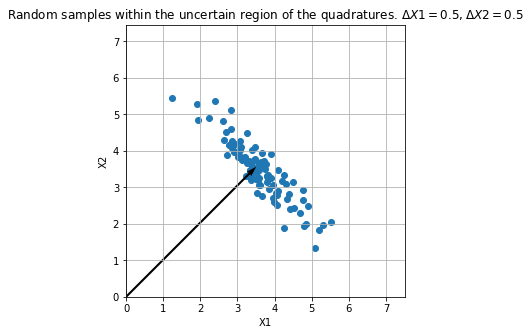

Phase squeezed states (Have amplitude variation):


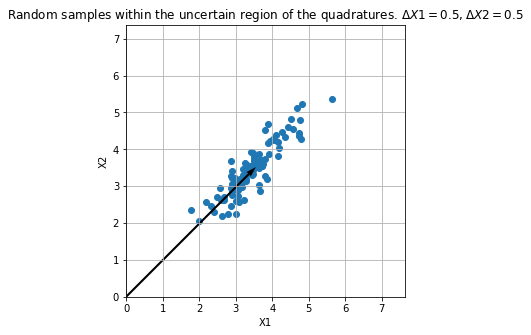

In [5]:
print('\033[1m'+'Amplitude squeezed states (Have phase variation):')
plot_quadratures(Xa,E0,phi)
print('\033[1m'+'Phase squeezed states (Have amplitude variation):')
plot_quadratures(Xp,E0,phi)

### Field samples

Amplitude squeezed states (Have phase variation):


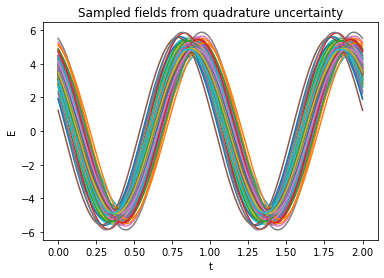

Phase squeezed states (Have amplitude variation):


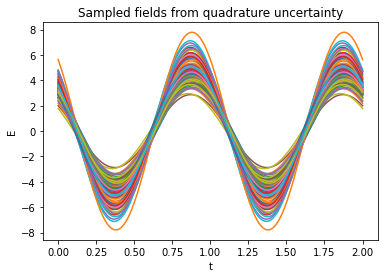

In [6]:
print('\033[1m'+'Amplitude squeezed states (Have phase variation):')
plot_sampledFields(Xa)

print('\033[1m'+'Phase squeezed states (Have amplitude variation):')
plot_sampledFields(Xp)